# Breast Cancer Classification Using Machine Learning

### ENSF 611 - Final Project
**Group Members:** Hareem Khan, Heena Heena

This notebook implements and compares three machine learning classification models to predict whether a breast tumour is malignant or benign using the Breast Cancer Wisconsin (Diagnostic) dataset.

### **Objectives**
- Preprocess and explore the dataset  
- Train and optimize:  
  - Logistic Regression  
  - Decision Tree Classifier  
  - Support Vector Machine (SVM)  
- Evaluate models using accuracy, precision, recall, F1, and ROC-AUC  
- Visualize confusion matrices and ROC curves  
- Provide a final comparison across all models  

The goal is to identify the best-performing model and evaluate whether the predictions are reliable enough for use by a medical research analyst seeking data-driven diagnostic support.

# 1. Import Required Libraries
Below we import all necessary Python libraries for data processing, modeling, evaluation, and visualization.


In [ ]:
# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)


# 2. Load Dataset and Check for Missing Values
We load the Breast Cancer Wisconsin dataset from scikit-learn, convert it to a DataFrame, and verify data integrity by filling missing values if any


In [ ]:
#Step 2: Load Dataset and checking missing values
# ==============================
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

df = X.copy()
df['target'] = y

# Check for missing values
print("Missing values before imputation:")
missing_counts = df.isnull().sum()   # <-- this line was missing
print(missing_counts)

# Only fill missing values if they exist
if missing_counts.sum() > 0:
    df = df.fillna(df.mean(numeric_only=True))
    print("\nMissing values were present and have been imputed.")

    # Update X and y only if imputation occurred
    X = df.drop("target", axis=1)
    y = df["target"]
else:
    print("\nNo missing values found. Imputation not required.")


Missing values before imputation:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

No missing values found. Imputation not required.


# 3. Train–Test Split (80/20)
We split the dataset using stratified sampling to preserve class proportions.


In [ ]:
# ==============================
# Step 3: Split Data (80/20)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 4. Feature Scaling (where needed)
Logistic Regression and SVM require scaled feature inputs for proper optimization.


In [ ]:
# ==============================
# Step 4: Scale Features (for Logistic Regression)
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5–13. Logistic Regression Model (Training, Tuning, Evaluation & Visualization)

In this section, we train a Logistic Regression classifier and evaluate its performance.  
Steps included in this single code block:

- Step 5: Initialize Logistic Regression  
- Step 6: Define hyperparameter grid  
- Step 7: Configure GridSearchCV  
- Step 8: Fit the model  
- Step 9: Extract best hyperparameters  
- Step 10: Evaluate model performance (accuracy, precision, recall, F1, ROC-AUC)  
- Step 11: Generate confusion matrix  
- Step 12: Plot ROC curve  
- Step 13: Display feature importance based on model coefficients

All steps relating to Logistic Regression—training, tuning, metrics, and visualizations—are grouped together for clarity.


Logistic Regression Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression Metrics:
Accuracy: 0.9825, Precision: 0.9861, Recall: 0.9861, F1: 0.9861, ROC AUC: 0.9957


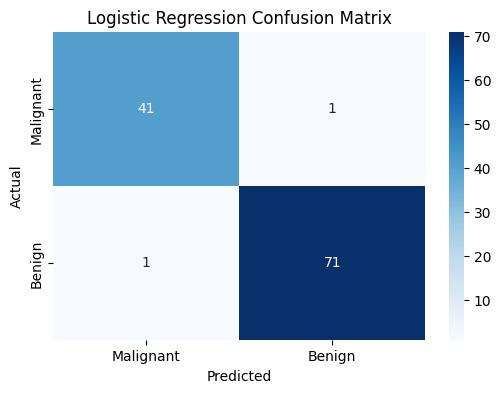

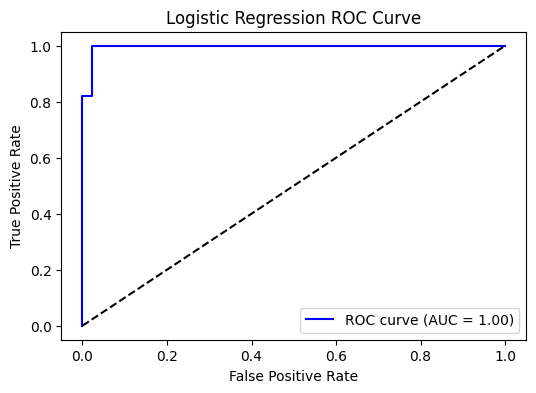

Top 10 Logistic Regression Features:
                 Feature  Coefficient  AbsCoefficient
21         worst texture    -1.242272        1.242272
10          radius error    -1.087929        1.087929
23            worst area    -0.979282        0.979282
13            area error    -0.958096        0.958096
20          worst radius    -0.946000        0.946000
27  worst concave points    -0.945296        0.945296
28        worst symmetry    -0.928729        0.928729
26       worst concavity    -0.827180        0.827180
22       worst perimeter    -0.764807        0.764807
24      worst smoothness    -0.759567        0.759567


/tmp/ipython-input-2995555513.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='coolwarm')


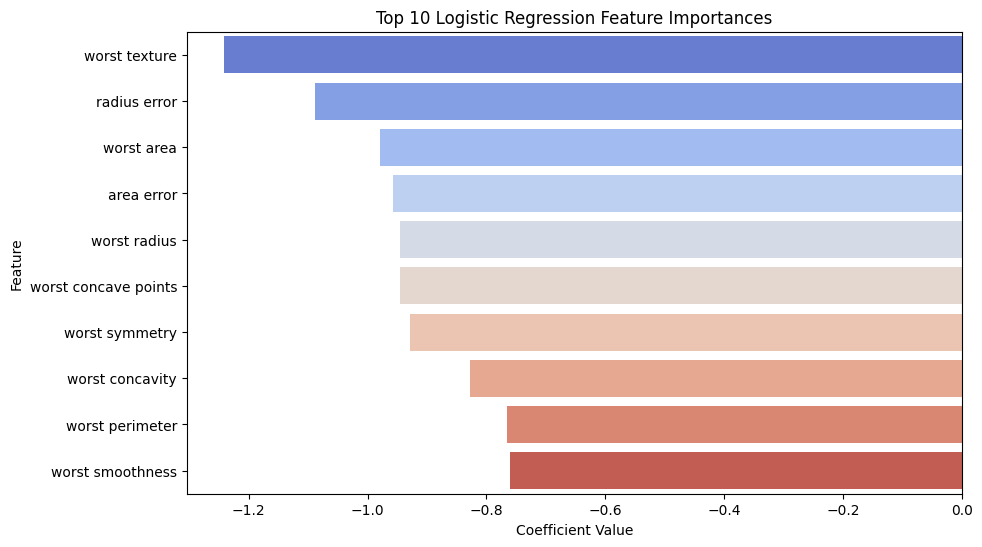

In [ ]:
# ==============================
# Step 5-10: Logistic Regression with Hyperparameter Tuning
# ==============================
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_reg = LogisticRegression(max_iter=10000, random_state=42)
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

best_log_reg = grid_search_lr.best_estimator_
print("Logistic Regression Best Hyperparameters:", grid_search_lr.best_params_)

y_pred_lr = best_log_reg.predict(X_test_scaled)
y_prob_lr = best_log_reg.predict_proba(X_test_scaled)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1: {f1_lr:.4f}, ROC AUC: {roc_auc_lr:.4f}")


# ==============================
# Step 11: Logistic Regression Confusion Matrix
# ==============================
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant','Benign'], yticklabels=['Malignant','Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# ==============================
# Step 12: Logistic Regression ROC Curve
# ==============================
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label=f'ROC curve (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# ==============================
# Step 13: Logistic Regression Feature Importance
# ==============================
features = data.feature_names
coefficients = best_log_reg.coef_[0]
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

print("Top 10 Logistic Regression Features:")
print(coef_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='coolwarm')
plt.title('Top 10 Logistic Regression Feature Importances')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


# 14–16. Decision Tree Classifier (Training, Tuning, Evaluation & Visualization)

This section handles all steps for the Decision Tree model in a single code block:

- Step 14: Train a Decision Tree classifier with GridSearchCV  
- Step 15: Generate and visualize the confusion matrix  
- Step 16: Plot the ROC curve
- Step 17: Display feature importance based on model coefficients  

The decision tree does not require feature scaling, and all related processes—training, tuning, predictions, metrics, and plots—are combined for clean organization.


Decision Tree Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Decision Tree Metrics:
Accuracy: 0.9211, Precision: 0.9565, Recall: 0.9167, F1: 0.9362, ROC AUC: 0.9163


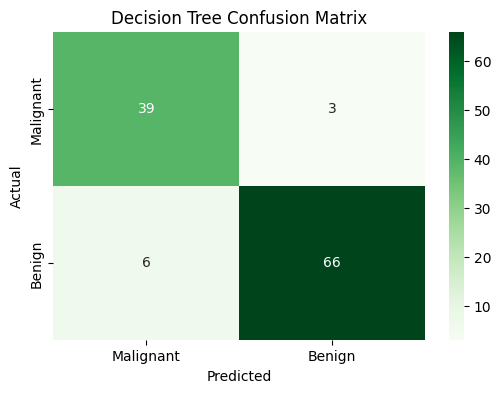

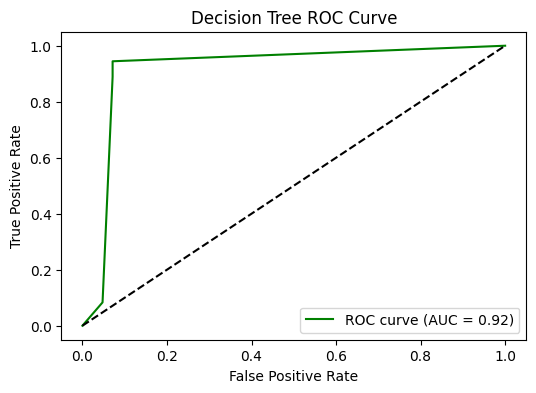

In [ ]:
# ==============================
# Step 14: Decision Tree Classifier
# ==============================
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)  # Decision tree does not need scaled data

best_dt = grid_search_dt.best_estimator_
print("Decision Tree Best Hyperparameters:", grid_search_dt.best_params_)

y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f"\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1: {f1_dt:.4f}, ROC AUC: {roc_auc_dt:.4f}")

# ==============================
# Step 15: Decision Tree Confusion Matrix
# ==============================
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Malignant','Benign'], yticklabels=['Malignant','Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# ==============================
# Step 16: Decision Tree ROC Curve
# ==============================
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label=f'ROC curve (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()

# ==============================
# Step 14: Decision Tree Classifier
# ==============================
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)  # Decision tree does not need scaled data

best_dt = grid_search_dt.best_estimator_
print("Decision Tree Best Hyperparameters:", grid_search_dt.best_params_)

y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f"\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1: {f1_dt:.4f}, ROC AUC: {roc_auc_dt:.4f}")

# ==============================
# Step 15: Decision Tree Confusion Matrix
# ==============================
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Malignant','Benign'], yticklabels=['Malignant','Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# ==============================
# Step 16: Decision Tree ROC Curve
# ==============================
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label=f'ROC curve (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()

# ==============================
# Step 17: Decision Tree Feature Importances (Printed List + Plot)
# ==============================

importances = best_dt.feature_importances_
feature_names = X.columns

dt_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

dt_importance_df = dt_importance_df.sort_values(by="Importance", ascending=False)

# Print top 10 features
print("Top 10 Decision Tree Features:")
print(dt_importance_df.head(10))

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=dt_importance_df.head(10), palette="Greens_r")
plt.title("Top 10 Decision Tree Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



# 17–20. Support Vector Machine (SVM) Classifier (Training, Tuning, Evaluation & Visualization)

This section covers the entire workflow for the Support Vector Machine model using an RBF kernel.

The steps included are:

- Step 18: Configure and train the SVM classifier with GridSearchCV  
- Step 19: Evaluate performance using accuracy, precision, recall, F1-score, and ROC-AUC  
- Step 20: Generate and visualize the confusion matrix  
- Step 21: Plot the ROC curve  

SVM requires scaled input features, so the model is trained using the previously standardized training data.


Best SVM Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

SVM Metrics:
Accuracy: 0.9825 | Precision: 0.9861 | Recall: 0.9861 | F1: 0.9861 | ROC-AUC: 0.9977


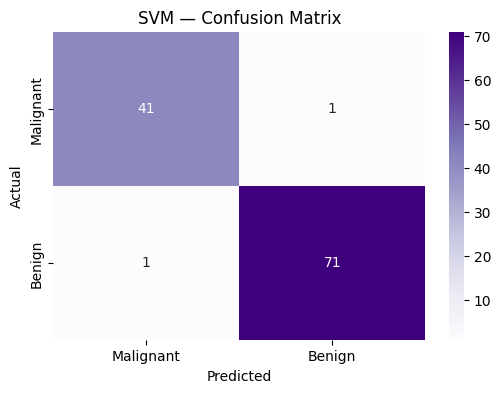

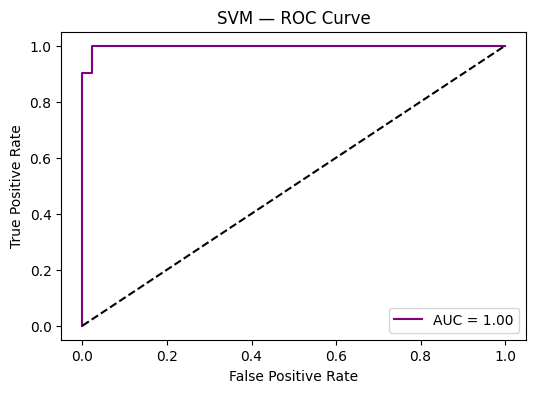

In [ ]:
# ==============================
# Steps 18–20: Support Vector Machine (SVM)
# ==============================

# Step 18: SVM with Hyperparameter Tuning
param_grid_svm = {
    "C": [0.1, 1, 10, 50, 100],
    "gamma": ["scale", 0.01, 0.001],
    "kernel": ["rbf"]
}

svm = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

best_svm = grid_search_svm.best_estimator_
print("Best SVM Parameters:", grid_search_svm.best_params_)

# Step 19: Predictions & Metrics
y_pred_svm = best_svm.predict(X_test_scaled)
y_prob_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

print("\nSVM Metrics:")
print(f"Accuracy: {accuracy_svm:.4f} | Precision: {precision_svm:.4f} | Recall: {recall_svm:.4f} | F1: {f1_svm:.4f} | ROC-AUC: {roc_auc_svm:.4f}")

# Step 20: Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, cmap="Purples", fmt="d",
            xticklabels=["Malignant", "Benign"],
            yticklabels=["Malignant", "Benign"])
plt.title("SVM — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 21: ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {roc_auc_svm:.2f}", color="purple")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM — ROC Curve")
plt.legend()
plt.show()


# 22. Final Model Comparison Table

This table summarizes the performance of all three classification models across the main evaluation metrics:

- Accuracy  
- Precision  
- Recall  
- F1 Score  
- ROC-AUC  

This comparison helps identify the strongest model for breast cancer prediction.


In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "SVM (RBF)"],
    "Accuracy": [accuracy_lr, accuracy_dt, accuracy_svm],
    "Precision": [precision_lr, precision_dt, precision_svm],
    "Recall": [recall_lr, recall_dt, recall_svm],
    "F1 Score": [f1_lr, f1_dt, f1_svm],
    "ROC-AUC": [roc_auc_lr, roc_auc_dt, roc_auc_svm]
})

# Format ONLY numeric columns
numeric_cols = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]

results.style.format({col: "{:.4f}" for col in numeric_cols})


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.9825,0.9861,0.9861,0.9861,0.9957
1,Decision Tree,0.9211,0.9565,0.9167,0.9362,0.9163
2,SVM (RBF),0.9825,0.9861,0.9861,0.9861,0.9977


# 23. Conclusions

## Overall Model Performance

Across the three classification models evaluated, both **Logistic Regression** and **SVM (RBF)** achieved exceptionally strong predictive performance on the Breast Cancer Wisconsin dataset. Each attained:

- **Accuracy:** 0.9825  
- **Precision:** 0.9861  
- **Recall:** 0.9861  
- **F1 Score:** 0.9861  

The key difference between them is found in the **ROC-AUC**, which measures the model’s ability to distinguish between malignant and benign tumours across all thresholds. Here:

- **SVM achieved the highest ROC-AUC (0.9977)**  
- **Logistic Regression** was slightly lower (0.9957)  
- **Decision Tree** showed noticeably weaker discriminatory ability (0.9163)

Although the difference between 0.9957 and 0.9977 may appear small, at a medical diagnosis level — where minimizing false negatives is critical — even small improvements in separability can be meaningful.

The **Decision Tree** model, while interpretable, underperformed with a lower accuracy (0.9211) and ROC-AUC (0.9163), indicating it is more prone to misclassification compared to the other models.

---

## Interpretation

This dataset is known for being **well-separable**, meaning malignant and benign tumours form distinct clusters in feature space.

- **Logistic Regression** performs extremely well because the classes are nearly linearly separable.  
- **SVM with an RBF kernel**, however, is capable of capturing more complex boundaries and subtle patterns when they exist — providing slightly stronger performance where Logistic Regression reaches its limit.

The ROC curves support this observation:

- The **SVM curve** hugs the top-left corner more closely, meaning it maintains a better tradeoff between true positives and false positives at various thresholds.  
- This is important in healthcare because lowering **false negatives** (missing a malignant tumour) is far more critical than minimizing false positives.

---

## Reccomendation

Therefore, although both LR and SVM perform nearly identically on primary metrics, **SVM offers greater robustness in borderline or ambiguous cases**, which aligns better with medical decision-support needs.


## 24. Combined ROC Curve Comparison

The following plot overlays the ROC curves of all three models (Logistic Regression, Decision Tree, and SVM).  
This visual comparison helps highlight which model provides the strongest separability between malignant and benign tumours.

A model with a curve closer to the top-left corner and a larger AUC value is considered better.


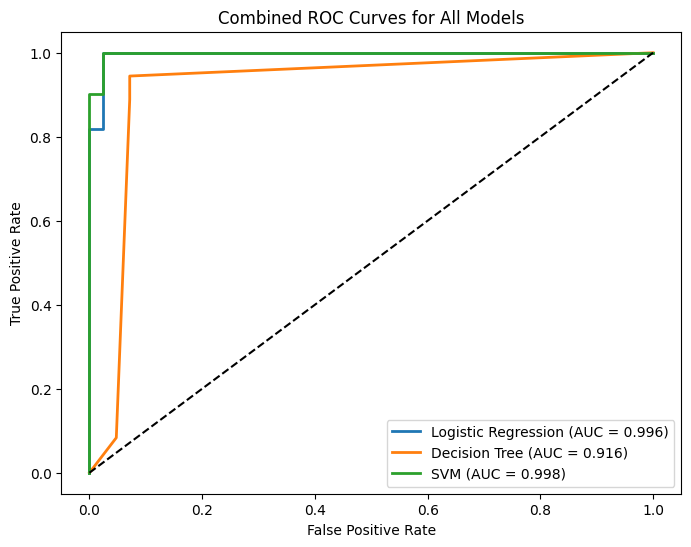

In [ ]:
# ==============================
# Step 24: Combined ROC Curves
# ==============================

plt.figure(figsize=(8,6))

# Logistic Regression curve
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})", linewidth=2)

# Decision Tree curve
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.3f})", linewidth=2)

# SVM curve
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.3f})", linewidth=2)

# Reference diagonal
plt.plot([0,1], [0,1], 'k--')

plt.title("Combined ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(False)

plt.show()


### Interpretation of Combined ROC Curve

The combined ROC curve provides a direct visual comparison of model performance:

- **SVM (RBF)** produces the strongest curve, staying closest to the top-left corner and achieving the highest AUC. This indicates superior separability between malignant and benign tumours.
- **Logistic Regression** performs almost identically, with an AUC just slightly lower than SVM. This confirms that the dataset is nearly linearly separable.
- **Decision Tree** has the weakest ROC curve and the lowest AUC, showing reduced ability to distinguish between classes.

Overall, the plot visually reinforces that **SVM is the best-performing model**, followed closely by Logistic Regression, while the Decision Tree underperforms relative to the other two.
